# Movielens Database

### Merging csv files from movie lens dataset

Background information: The movies data set provides a solid foundation to Data Science learners for doing data analysis. This data file can be downloaded from the famous movie lens webpage (given in the link below). The three files are movies.csv, users.csv and ratings.csv. The users.csv contains information about the user’s gender, age and preference. The movies data set contains information about the movie name and genre. The ratings.csv file contains information on the ratings given by the users

Purpose of the case study: The purpose of this exercise is to understand how to do a meaningful merge twice – first, merge two data files and then merge the resulting file with a third data file

Problem description: Do a merge of all the three files movies.csv, users.csv and ratings.csv in an appropriate way as one csv file namely movies_integrated.csv by using a common column id present in each data file

Dataset:  https://grouplens.org/datasets/movielens/

In [4]:
#%%
import pandas as pd
import numpy as np
import seaborn as sns
import squarify
import matplotlib.pyplot as plt
%matplotlib inline

#Define PATH for the files to import
user = r"C:\Users\HSASS\OneDrive - Wipro\Desktop\Trainng-Perl_Python\Data Science Training\DS_1\ml-1m\users.dat"
ratings = r"C:\Users\HSASS\OneDrive - Wipro\Desktop\Trainng-Perl_Python\Data Science Training\DS_1\ml-1m\ratings.dat"
movies = r"C:\Users\HSASS\OneDrive - Wipro\Desktop\Trainng-Perl_Python\Data Science Training\DS_1\ml-1m\movies.dat"
final_out = r"C:\Users\HSASS\OneDrive - Wipro\Desktop\Trainng-Perl_Python\Data Science Training\DS_1\ml-1m\integrated.csv"

usernames=['user_id','gender','age','occupation','zip']
users=pd.read_table(user,sep='::',engine='python',header=None,names=usernames)

rnames=['user_id','movie_id','rating','timestamp']
ratings=pd.read_table(ratings,sep='::',engine='python',header=None,names=rnames)

mnames=['movie_id','title','genres']
movies=pd.read_table(movies,sep='::',engine='python',header=None,names=mnames)

users.head()


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [23]:
integrated = pd.merge(pd.merge(ratings,users),movies)
integrated

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [24]:
integrated.to_csv(final_out, index=False)

### Comparison of movie ratings given by Ladies and Gentlemen

Background information: The movies data set is downloaded in the previous case study. If you consider the ratings given for a product or food ordered in a restaurant or for movies the ratings vary depending upon the independent variables like gender, age and place. The ratings also vary for the same product in different stores or web sites. In this case study we consider the ratings given by users for movies and check if there are any rating differences

Purpose: The purpose of this exercise is to find out if there is any difference in movie ratings between gentlemen and ladies after looking through all the nearly 1 million ratings available in the dataset

Problem description: We have created the new merged movies_integrated.csv from the previous case study. Use that merged file to find if there is any difference in the way ladies and gentlemen rate the movies. If there is a difference in rating between genders, then show it in your data analysis and also through data visualization

Dataset:  https://grouplens.org/datasets/movielens/

In [25]:
data=pd.read_csv(final_out)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [26]:
ratings_by_title=data.groupby('title').size()
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [27]:
mean_ratings=data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [28]:
mean_ratings_diff=mean_ratings['F']-mean_ratings['M']
mean_ratings_diff

title
$1,000,000 Duck (1971)                        0.613095
'Night Mother (1986)                          0.035948
'Til There Was You (1997)                    -0.057658
'burbs, The (1989)                           -0.168607
...And Justice for All (1979)                 0.139547
                                                ...   
Zed & Two Noughts, A (1985)                   0.119048
Zero Effect (1998)                            0.141266
Zero Kelvin (Kjærlighetens kjøtere) (1995)         NaN
Zeus and Roxanne (1997)                       0.420635
eXistenZ (1999)                              -0.190494
Length: 3706, dtype: float64

In [29]:
higher_male_rating=len(mean_ratings[mean_ratings_diff<0].index) #Females have rated less
higher_female_rating=len(mean_ratings[mean_ratings_diff>=0]) #Females have rated more
higher_female_rating
print(higher_female_rating>higher_male_rating) #More females rate higher than males

True


(array([0, 1]), <a list of 2 Text xticklabel objects>)

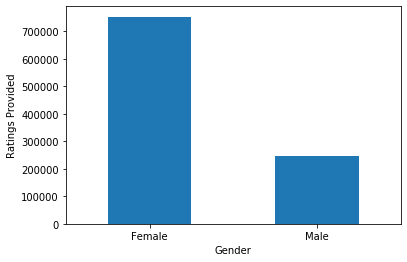

In [32]:
Xlabels = ['Female', 'Male']
ax = data['gender'].value_counts().plot(kind='bar')
ax.set_ylabel('Ratings Provided')
ax.set_xlabel('Gender')
ax.set_xticklabels(Xlabels);
plt.xticks(rotation=0)